# Iris Flower Classification

### Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


### Load and Inspect the Dataset

In [20]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the dataset
df = pd.read_csv('iris.data.csv', header=None, names=column_names)

# Display first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Inspect the DataFrame

In [21]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Class distribution
df['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Cleaning

In [22]:
# Check for missing values
df.isnull().sum()

# Null percentage
null_percentage = df.isnull().mean() * 100
print(null_percentage)


sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
class           0.0
dtype: float64


## Label Encode the Target

In [23]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  # 0=Setosa, 1=Versicolor, 2=Virginica

## Train-Test Split

In [24]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training (Logistic Regression, Decision Tree, SVM)

In [25]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


## Evaluation - Accuracy, F1 Score

In [26]:
def evaluate_model(name, y_true, y_pred):
    print(f"🔍 {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-"*60)

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("SVM", y_test, y_pred_svm)

🔍 Logistic Regression
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------------------------
🔍 Decision Tree
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.0

## Residual Analysis (for Logistic Regression)

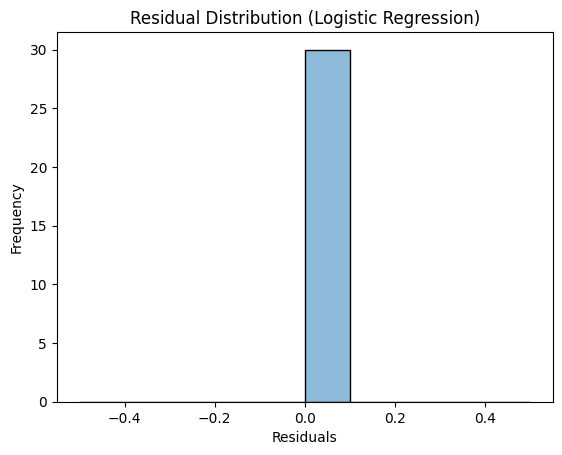

In [27]:
# For classification, residual = actual - predicted
residuals = y_test - y_pred_lr

# Plot residuals
sns.histplot(residuals, kde=True, bins=10)
plt.title("Residual Distribution (Logistic Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Error Graph

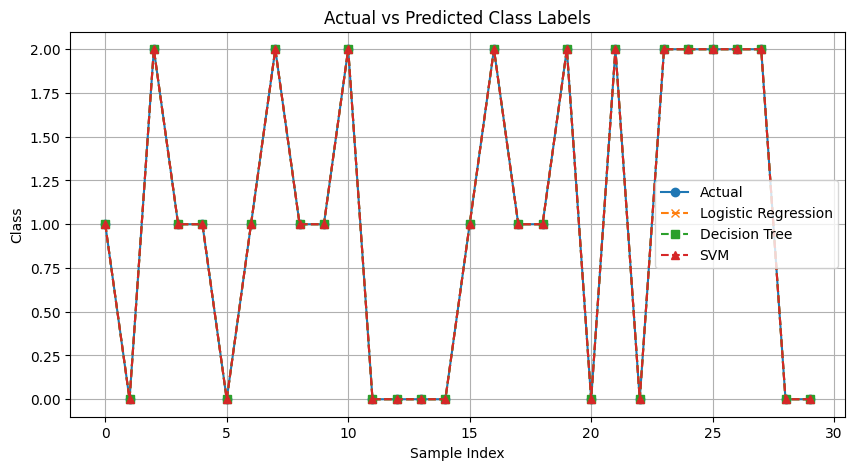

In [28]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted (LR)': y_pred_lr,
    'Predicted (DT)': y_pred_dt,
    'Predicted (SVM)': y_pred_svm
})

# Error graph
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df['Predicted (LR)'], label='Logistic Regression', linestyle='--', marker='x')
plt.plot(comparison_df['Predicted (DT)'], label='Decision Tree', linestyle='--', marker='s')
plt.plot(comparison_df['Predicted (SVM)'], label='SVM', linestyle='--', marker='^')
plt.legend()
plt.title("Actual vs Predicted Class Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.grid(True)
plt.show()
